In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import seaborn as sns
from pathlib import Path

In [10]:
path = Path().cwd()
dataPath = path / "data" / "HR_data.csv" #path.parent

data = pd.read_csv(dataPath)
set(data.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [125]:
Data_results = copy.copy(data.iloc[:,1:52])
types = ['Round','Phase','Cohort']
Data_type = copy.copy(data[types])
Data_answers = copy.copy(data.iloc[:,54:].drop(columns='Cohort'))

for t in types:
    print(set(Data_type[t]))
    Data_type[t] = Data_type[t].str[-1]
Data_type


{'round_3', 'round_1', 'round_4', 'round_2'}
{'phase3', 'phase1', 'phase2'}
{'D1_1', 'D1_3', 'D1_4', 'D1_2', 'D1_6', 'D1_5'}


,Round,Phase,Cohort
0,3,3,4
1,3,2,4
2,3,1,4
3,2,3,4
4,2,2,4
...,...,...,...
307,4,2,5
308,4,1,5
309,1,3,5
310,1,2,5


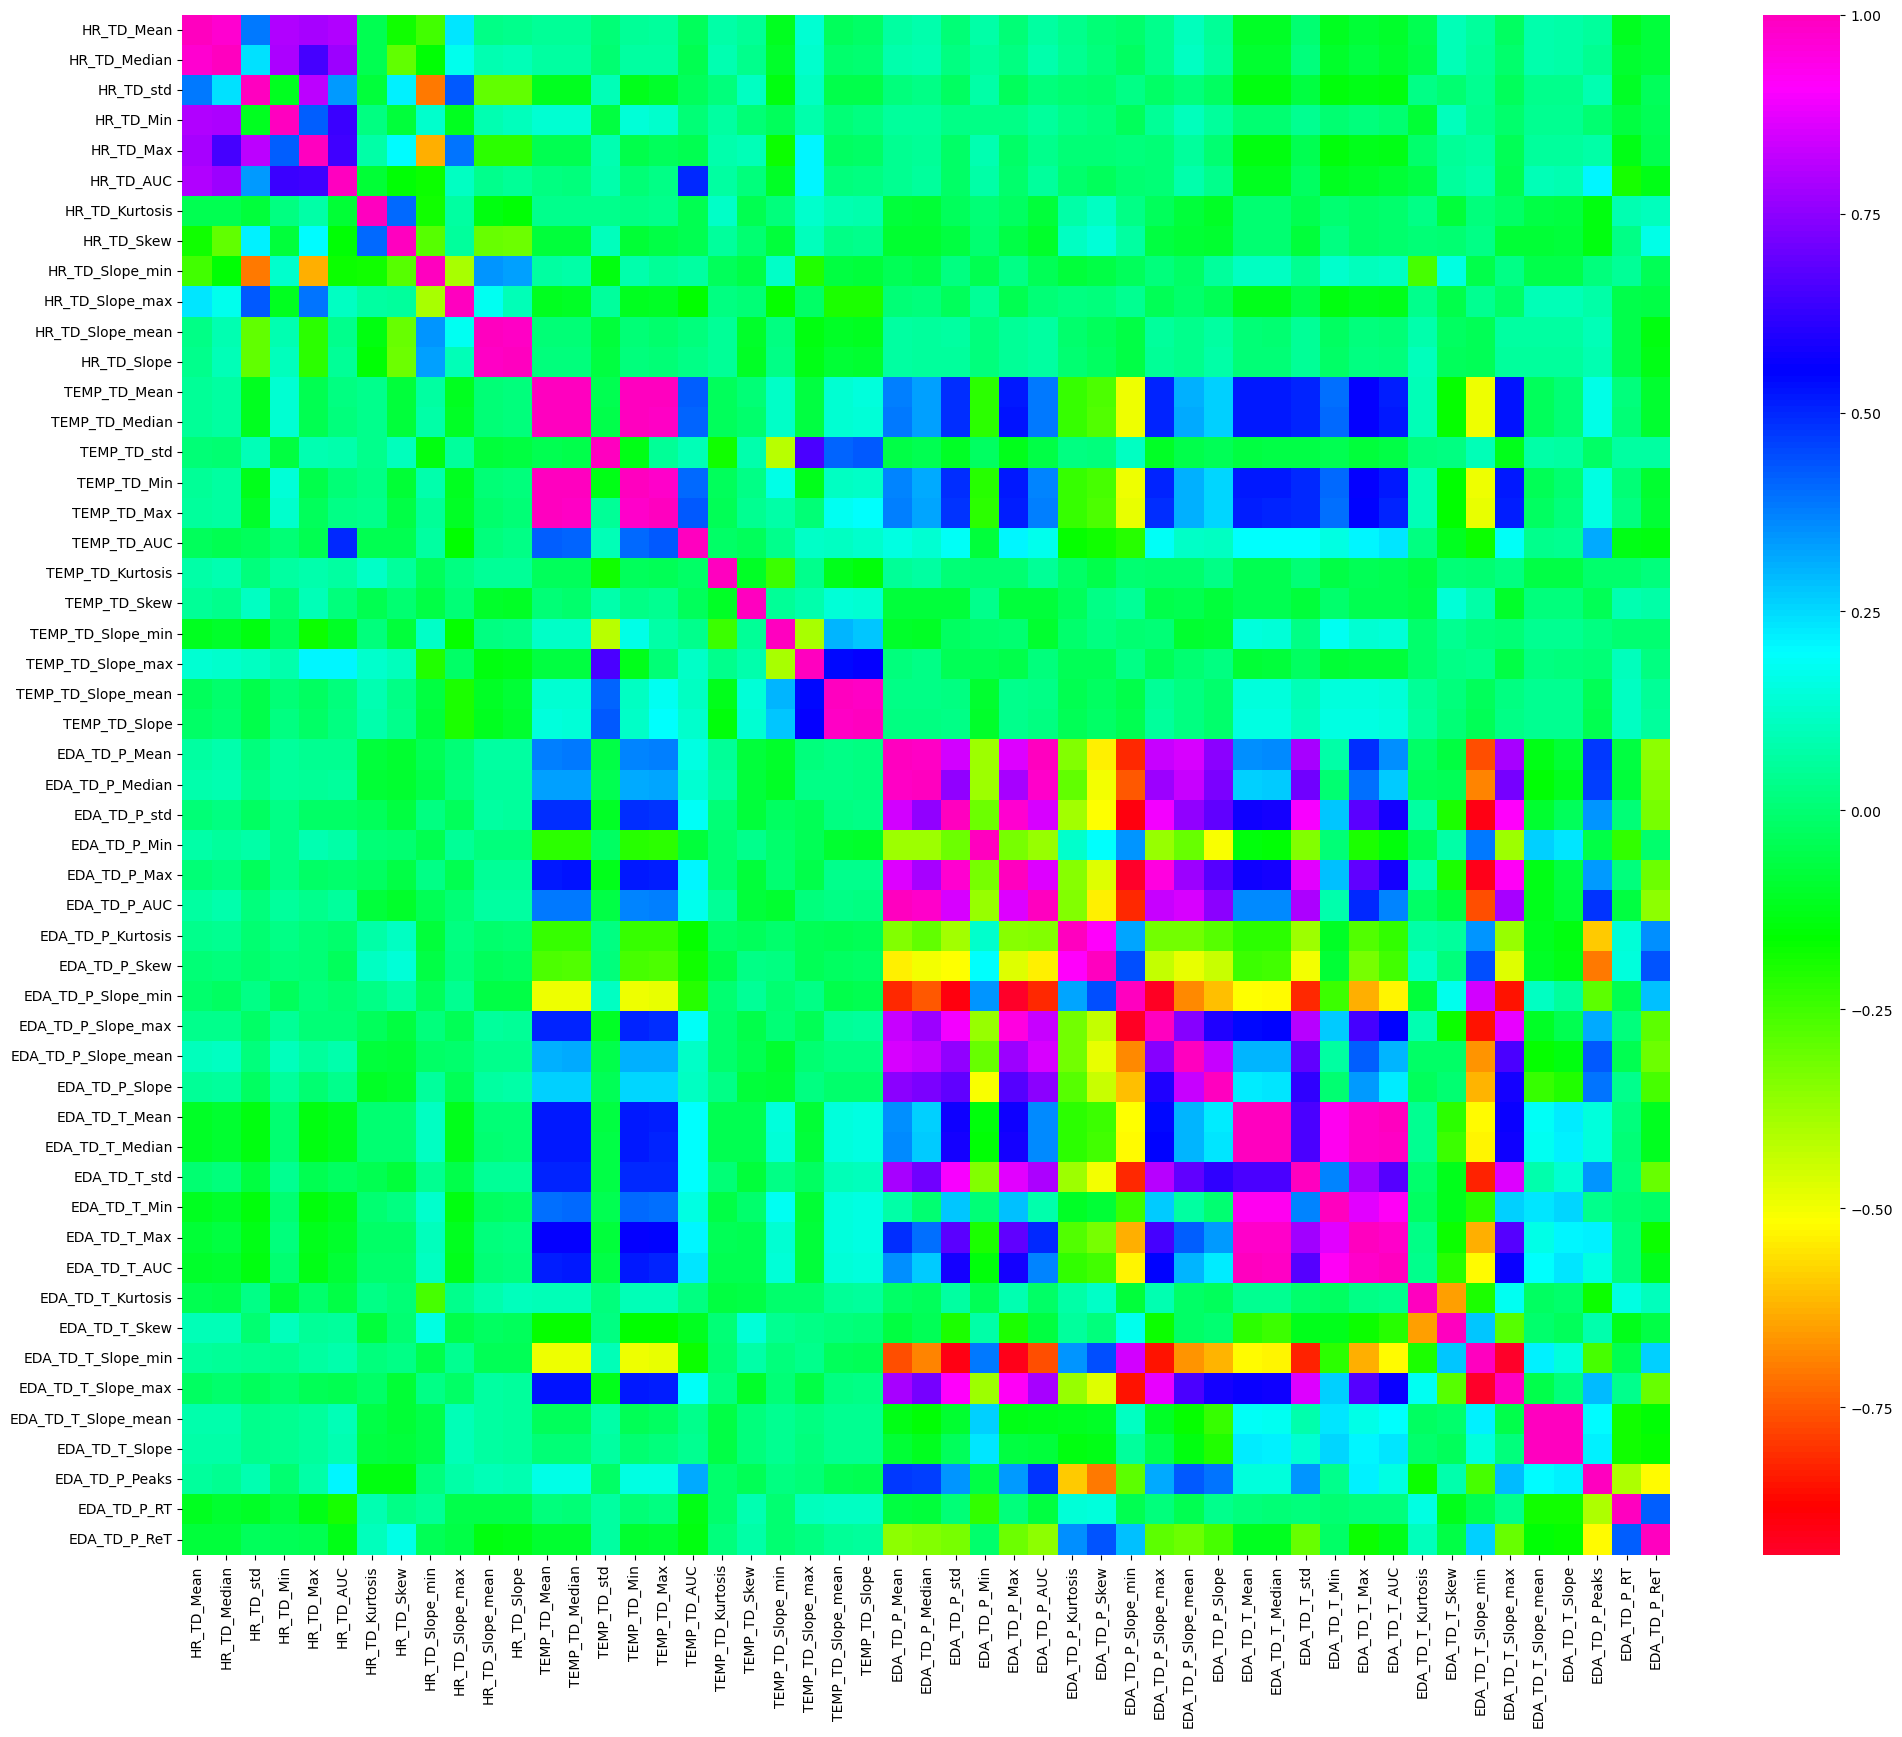

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(24,20))
sns.heatmap(Data_results.corr(), ax=ax, cmap="gist_rainbow");

/var/folders/10/4z_g1tb12dz272hh2pfk832w0000gp/T/ipykernel_5441/1673520315.py:9: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



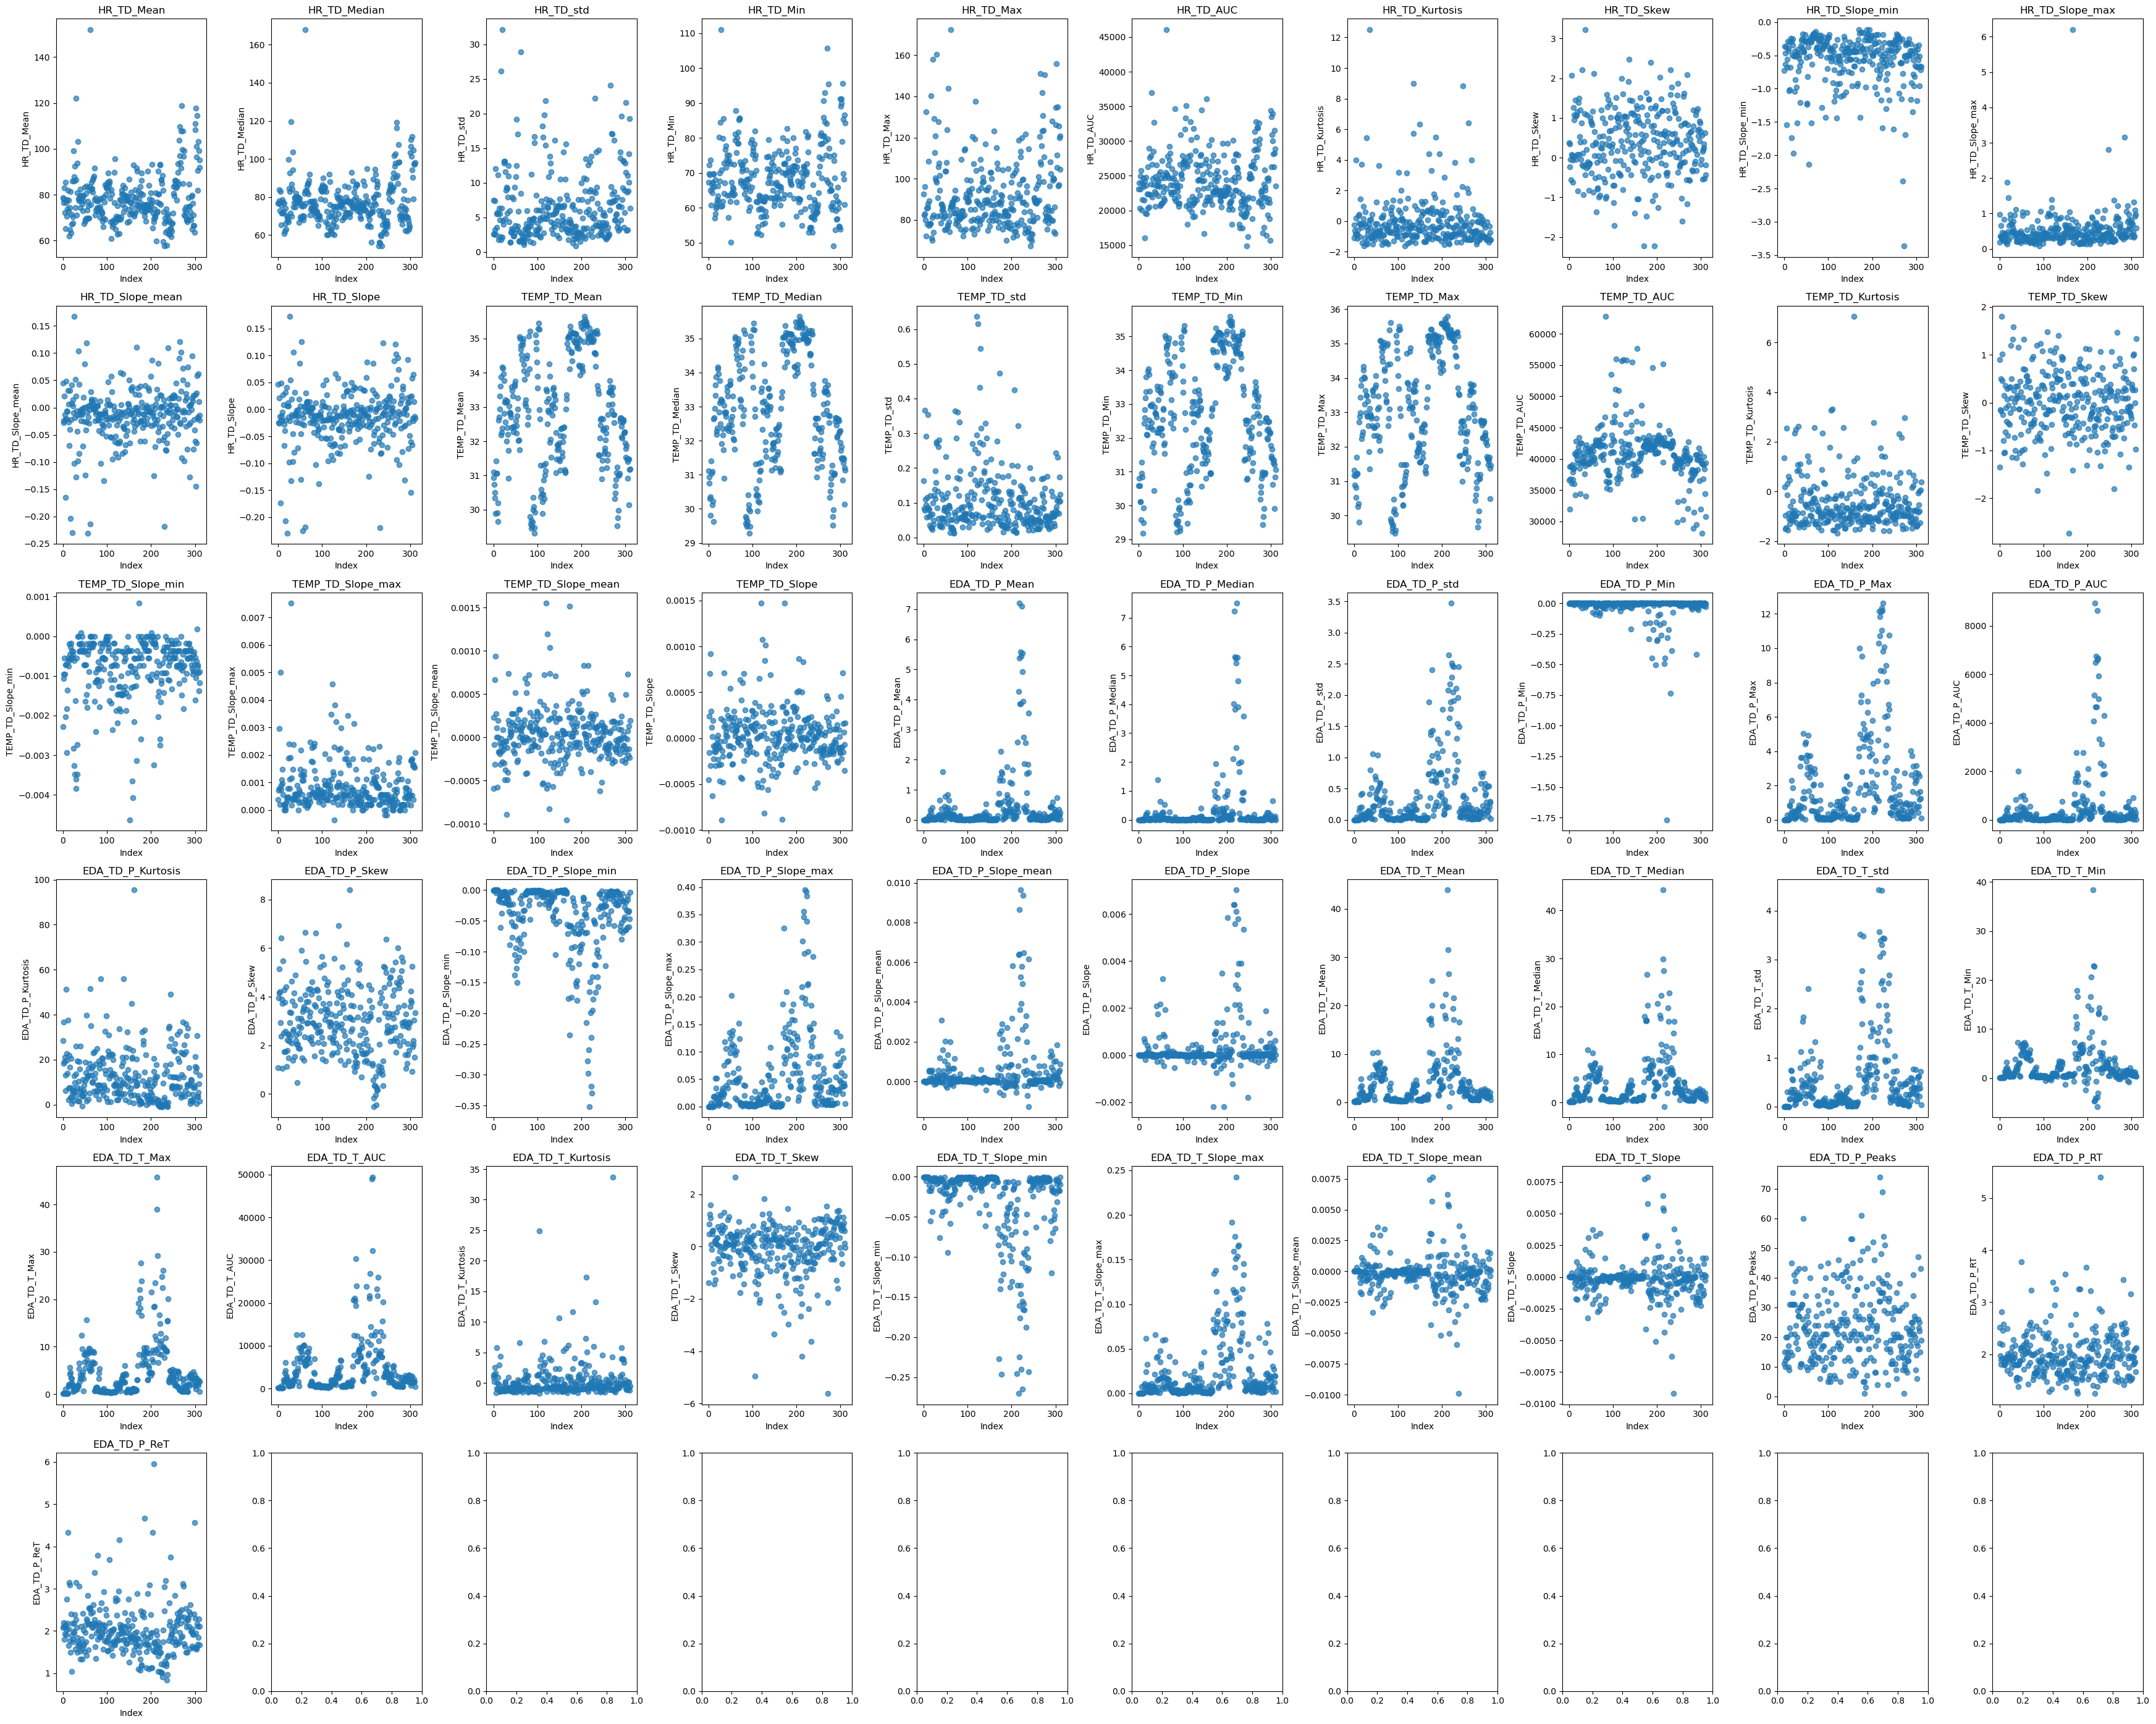

In [139]:
fig, axes = plt.subplots(nrows=6, ncols=10, figsize=(35, 28)) 
axes = axes.flatten()

columns_to_plot = [col for col in Data_results.columns]

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    
    scatter = ax.scatter(
        Data_results.index, 
        Data_results[col], 
        # c = Data_type['Round'],
        cmap='bwr',
        alpha=0.7
    )
    
    ax.set_title(col)
    ax.set_xlabel('Index')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()


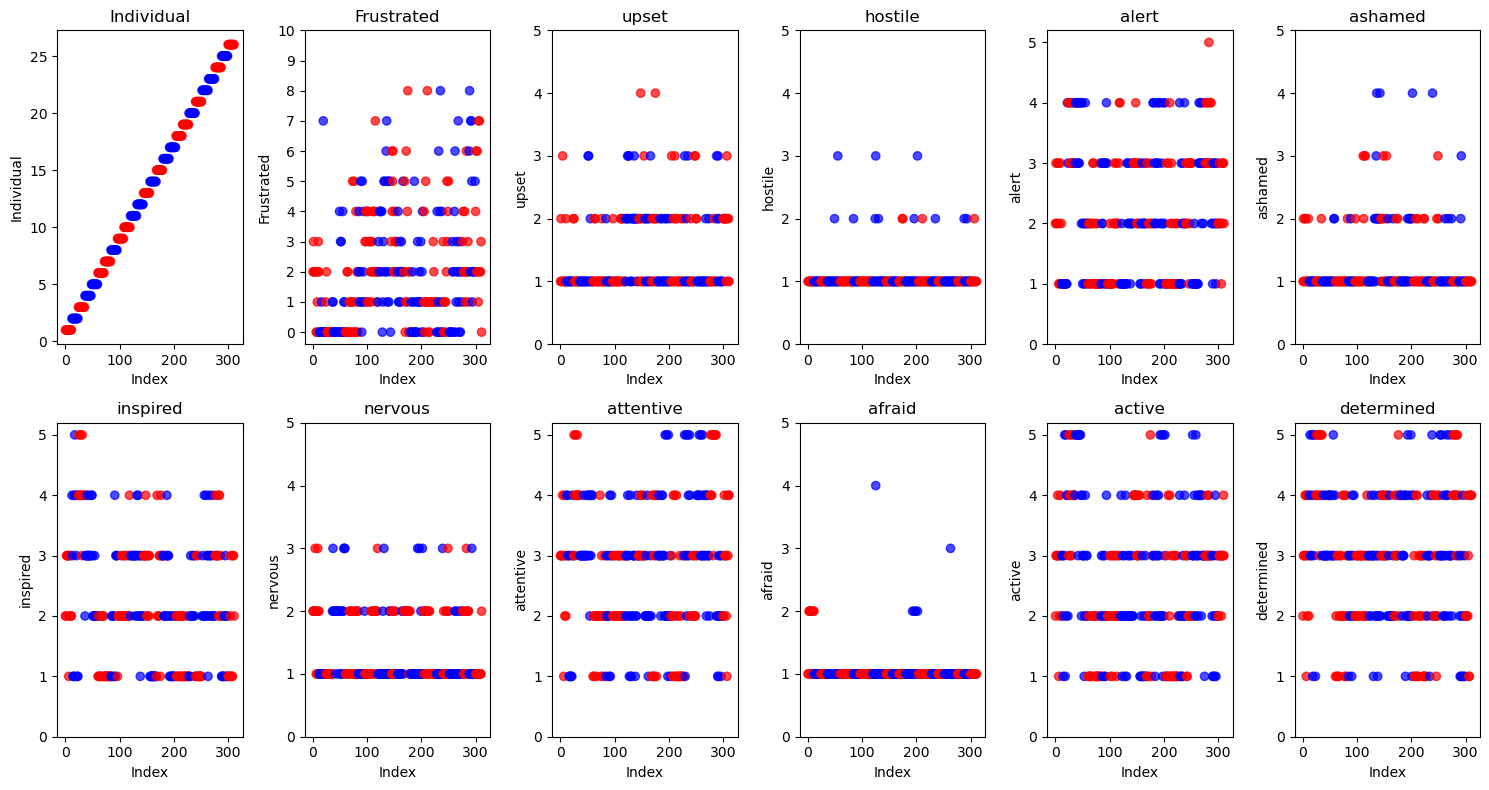

In [136]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15, 8)) 
axes = axes.flatten()

columns_to_plot = [col for col in Data_answers.columns if col != 'Puzzler']

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    
    scatter = ax.scatter(
        Data_answers.index, Data_answers[col], 
        c=Data_answers['Puzzler'], 
        cmap='bwr',
        alpha=0.7
    )
    
    ax.set_title(col)
    ax.set_xlabel('Index')
    ax.set_ylabel(col)

    # Decide y-ticks
    max_val = Data_answers[col].max()
    if max_val <= 5:    ax.set_yticks(range(0, 6))  # 1–5
    elif max_val <=10:  ax.set_yticks(range(0, 11))  # 0–10

plt.tight_layout()
plt.show()


In [54]:
from collections import Counter

Counter(Data_answers['Individual']);

In [ ]:
import plotly.express as px
import pandas as pd

In [95]:
Data_answers.iloc[:2]

,Individual,Puzzler,Frustrated,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,1,1,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,1,1,3.0,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0


In [103]:
df = Data_answers.iloc[:]

df = df[df['Puzzler'] == 0]
df = df.iloc[:,2:]

# Build list of dimensions manually with forced ranges
dimensions = []
for col in df.columns:
    max_val = df[col].max()
    if max_val <= 5:  
        if col in ['inspired','attentive','active','determined']: 
            dimensions.append({'range': [5, 0],'label': col,'values': df[col]})
        else:
            dimensions.append({'range': [0, 5],'label': col,'values': df[col]})
    elif max_val <=10:
        dimensions.append({'range': [0, 10],'label': col,'values': df[col]})


# Create parallel coordinates plot
fig = px.parallel_coordinates(
    df,
    color="Frustrated",
    color_continuous_scale=px.colors.diverging.Tealrose
)

# Override the default dimensions with our forced ranges
fig.update_traces(dimensions=dimensions)
fig.show()
